In [139]:
from qiskit import QuantumCircuit
!pip install pylatexenc # install to get matplotlib visulaization 

In [140]:
qc = QuantumCircuit(3, 3)

### Step 0: Prepare the mysterious qubit $|\psi\rangle$ 

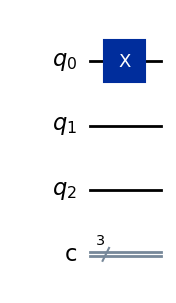

In [141]:
qc.x(0)
qc.draw('mpl')

In [142]:
qc.measure(1,1)

###  Step 1: create an entangled Bell pair between Alice and Bob (q1 & q2)

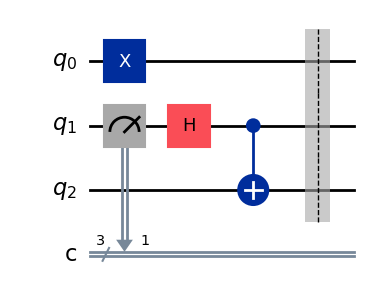

In [143]:
qc.h(1)
qc.cx(1,2)
qc.barrier() # put a barrier to demarcate
qc.draw('mpl')

### Step 2: Alice applies a series of operations between the state to teleport (q0) and her half of the Bell pair (q1)

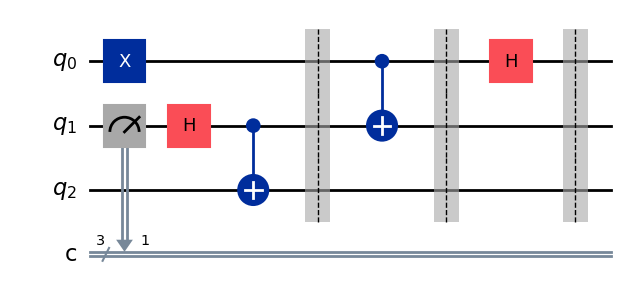

In [144]:
qc.cx(0,1)
qc.barrier()
qc.h(0)
qc.barrier() # put a barrier to visualize 
qc.draw('mpl')

### Step 3: Alice measures on q0 and q1, send the results to Bob as classical bits

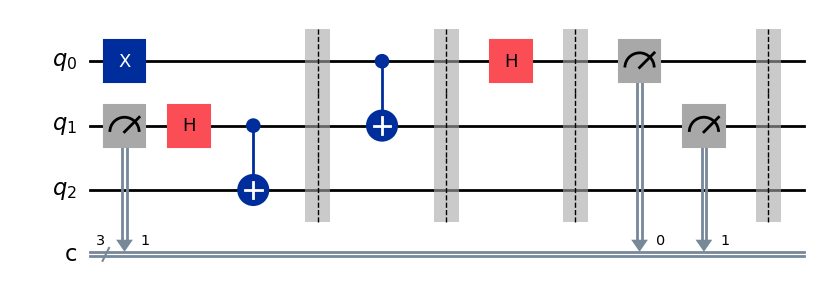

In [145]:
#qc.measure([0, 1], [0, 1]) # results stored in classical bits 0 and 1, respectively
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
qc.draw('mpl')


### Step 4: Based on Alice's results, Bob performs gates and measures

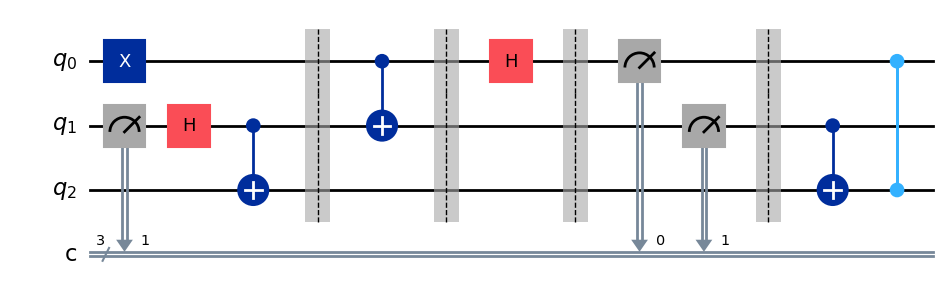

In [146]:
qc.cx(1,2)
qc.cz(0,2)
qc.draw('mpl')

### Step 5: Bob measures

In [147]:
qc.measure([2], [2])

### Let's draw the full circuit

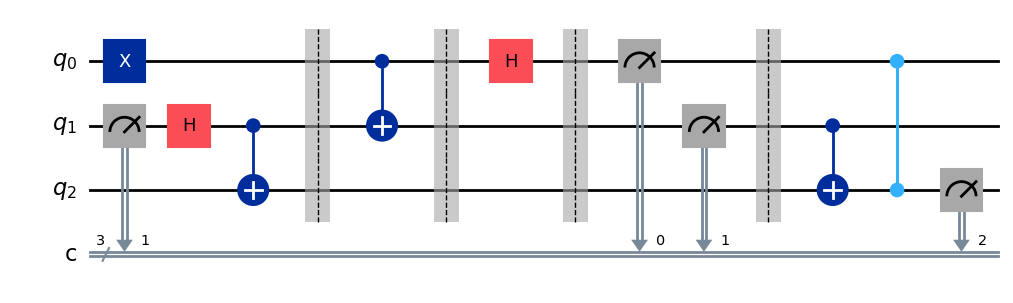

In [148]:
%matplotlib inline
qc.draw(output='mpl')

## Simulate the circuit now

In [149]:
from qiskit import transpile 

# Use AerSimulator
from qiskit_aer import AerSimulator

backend = AerSimulator()

# First we have to transpile the quantum circuit 
# to the low-level QASM instructions used by the 
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
shots = 10000
job_sim = backend.run(qc_compiled, shots=shots)

# Grab the results from the job.
result_sim = job_sim.result()

In [150]:
counts = result_sim.get_counts(qc_compiled)
print(counts)
counts_percentage = {state: int((count / shots) * 100) for state, count in counts.items()}
print(counts_percentage)

{'111': 2476, '100': 2564, '110': 2443, '101': 2517}
{'111': 24, '100': 25, '110': 24, '101': 25}


Text(0, 0.5, 'Percentage (%)')

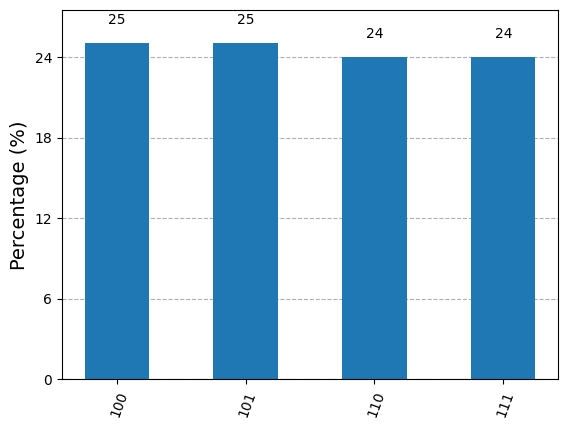

In [151]:
from qiskit.visualization import plot_histogram

fig, ax = plt.subplots()
plot_histogram(counts_percentage, ax=ax)
ax.set_ylabel('Percentage (%)')